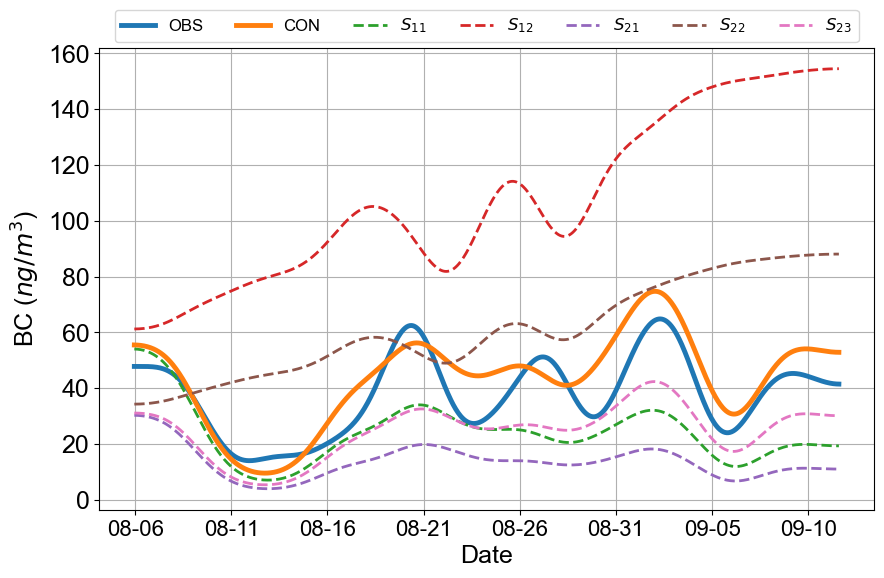

In [38]:
## 读取mat文件

import scipy.io as sio
import matplotlib.pyplot as plt  
import pandas as pd
import matplotlib.dates as mdates
from scipy.ndimage import gaussian_filter1d


plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'], 
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 18,
})


data_BC_real = sio.loadmat('./Mat_Files/BC_real.mat')  
data_BC_control=sio.loadmat('./Mat_Files/BC_control.mat')
data_BC_s11=sio.loadmat('./Mat_Files/BC_s11.mat')
data_BC_s12=sio.loadmat('./Mat_Files/BC_s12.mat')
data_BC_s21=sio.loadmat('./Mat_Files/BC_s21.mat')
data_BC_s22=sio.loadmat('./Mat_Files/BC_s22.mat')
data_BC_s23=sio.loadmat('./Mat_Files/BC_s23.mat')
data_time_index = pd.date_range(start='2020-08-05 23:00', end='2020-09-11 15:00', freq='h')

choose=880
sigma = 30
BC_real=data_BC_real['BC'].flatten()[0:choose]
BC_control=data_BC_control['BC_control'].flatten()[0:choose]
BC_s11 = data_BC_s11['BC_s11'].flatten()[0:choose]
BC_s12 = data_BC_s12['BC_s12'].flatten()[0:choose]
BC_s21 = data_BC_s21['BC_s21'].flatten()[0:choose]
BC_s22 = data_BC_s22['BC_s22'].flatten()[0:choose]
BC_s23 = data_BC_s23['BC_s23'].flatten()[0:choose]
smooth_BC_real = gaussian_filter1d(BC_real, sigma=sigma).flatten()
smooth_BC_control = gaussian_filter1d(BC_control, sigma=sigma).flatten()
smooth_BC_s11 = gaussian_filter1d(BC_s11, sigma=sigma).flatten()
smooth_BC_s12 = gaussian_filter1d(BC_s12, sigma=sigma).flatten()
smooth_BC_s21 = gaussian_filter1d(BC_s21, sigma=sigma).flatten()
smooth_BC_s22 = gaussian_filter1d(BC_s22, sigma=sigma).flatten()
smooth_BC_s23 = gaussian_filter1d(BC_s23, sigma=sigma).flatten()

time_index=data_time_index[0:choose]
    
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.plot(time_index,smooth_BC_real,label='OBS',linewidth=3.5,linestyle='-')
ax1.plot(time_index,smooth_BC_control,label='CON',linewidth=3.5,linestyle='-')
ax1.plot(time_index,smooth_BC_s11,label='$S_{11}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s12,label='$S_{12}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s21,label='$S_{21}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s22,label='$S_{22}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s23,label='$S_{23}$',linewidth=2,linestyle='--')

ax1.grid(True)
ax1.set_xlabel('Date')
ax1.set_ylabel('BC ($ ng/m^3$)')  
legend = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=8,prop={'family': 'sans-serif', 'size': 12})
plt.savefig('../Figures/Figure2_七种不同的模拟结果.svg')
plt.show()



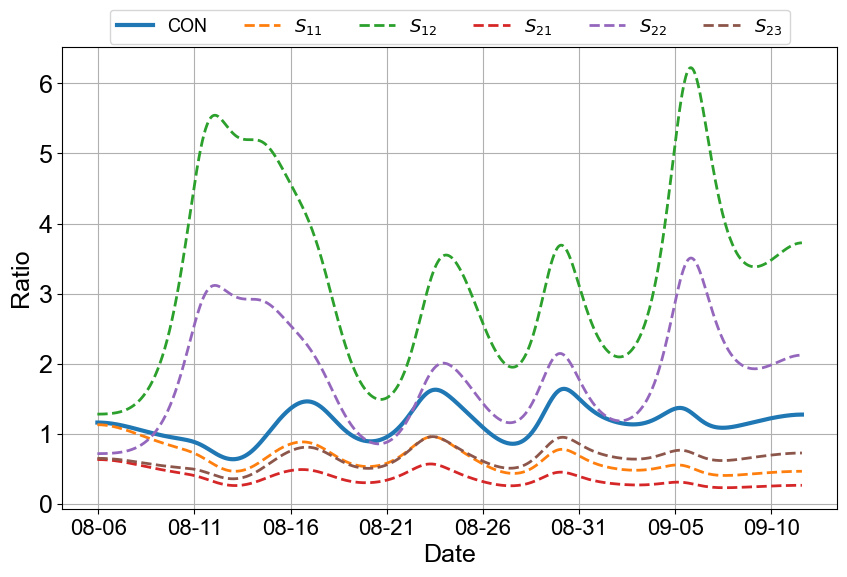

In [39]:
## 读取mat文件

import scipy.io as sio
import matplotlib.pyplot as plt  
import numpy as np  
import pandas as pd
import matplotlib.dates as mdates

plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'], 
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 16,
    'ytick.labelsize': 18,
})


data_BC_real = sio.loadmat('./Mat_Files/BC_real.mat')  
data_BC_control=sio.loadmat('./Mat_Files/BC_control.mat')
data_BC_s11=sio.loadmat('./Mat_Files/BC_s11.mat')
data_BC_s12=sio.loadmat('./Mat_Files/BC_s12.mat')
data_BC_s21=sio.loadmat('./Mat_Files/BC_s21.mat')
data_BC_s22=sio.loadmat('./Mat_Files/BC_s22.mat')
data_BC_s23=sio.loadmat('./Mat_Files/BC_s23.mat')
data_time_index = pd.date_range(start='2020-08-05 23:00', end='2020-09-11 15:00', freq='h')


## 后面模拟不准的还管它干啥捏
## 那截取一部分出来
## 截取这部分的原因是这部分数据比较真实
## 相关系数较高达到0.7
## 越到后面相关系数越低模拟不准了

choose=880
sigma = 30
BC_real=data_BC_real['BC'].flatten()[0:choose]
BC_control=data_BC_control['BC_control'].flatten()[0:choose]
BC_s11 = data_BC_s11['BC_s11'].flatten()[0:choose]
BC_s12 = data_BC_s12['BC_s12'].flatten()[0:choose]
BC_s21 = data_BC_s21['BC_s21'].flatten()[0:choose]
BC_s22 = data_BC_s22['BC_s22'].flatten()[0:choose]
BC_s23 = data_BC_s23['BC_s23'].flatten()[0:choose]
smooth_BC_real = gaussian_filter1d(BC_real, sigma=sigma).flatten()
smooth_BC_control = gaussian_filter1d(BC_control, sigma=sigma).flatten()
smooth_BC_s11 = gaussian_filter1d(BC_s11, sigma=sigma).flatten()
smooth_BC_s12 = gaussian_filter1d(BC_s12, sigma=sigma).flatten()
smooth_BC_s21 = gaussian_filter1d(BC_s21, sigma=sigma).flatten()
smooth_BC_s22 = gaussian_filter1d(BC_s22, sigma=sigma).flatten()
smooth_BC_s23 = gaussian_filter1d(BC_s23, sigma=sigma).flatten()

time_index=data_time_index[0:choose]
    
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.xaxis.set_major_locator(plt.MaxNLocator(10)) 
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

ax1.plot(time_index,smooth_BC_control/smooth_BC_real,label='CON',linewidth=3,linestyle='-')
ax1.plot(time_index,smooth_BC_s11/smooth_BC_real,label='$S_{11}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s12/smooth_BC_real,label='$S_{12}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s21/smooth_BC_real,label='$S_{21}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s22/smooth_BC_real,label='$S_{22}$',linewidth=2,linestyle='--')
ax1.plot(time_index,smooth_BC_s23/smooth_BC_real,label='$S_{23}$',linewidth=2,linestyle='--')
ax1.grid(True)
ax1.set_xlabel('Date')
ax1.set_ylabel('Ratio')
legend = ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=7,prop={'family': 'sans-serif', 'size': 13})
plt.savefig('../Figures/Figure3_七种不同的模拟结果比值.svg')
plt.show()



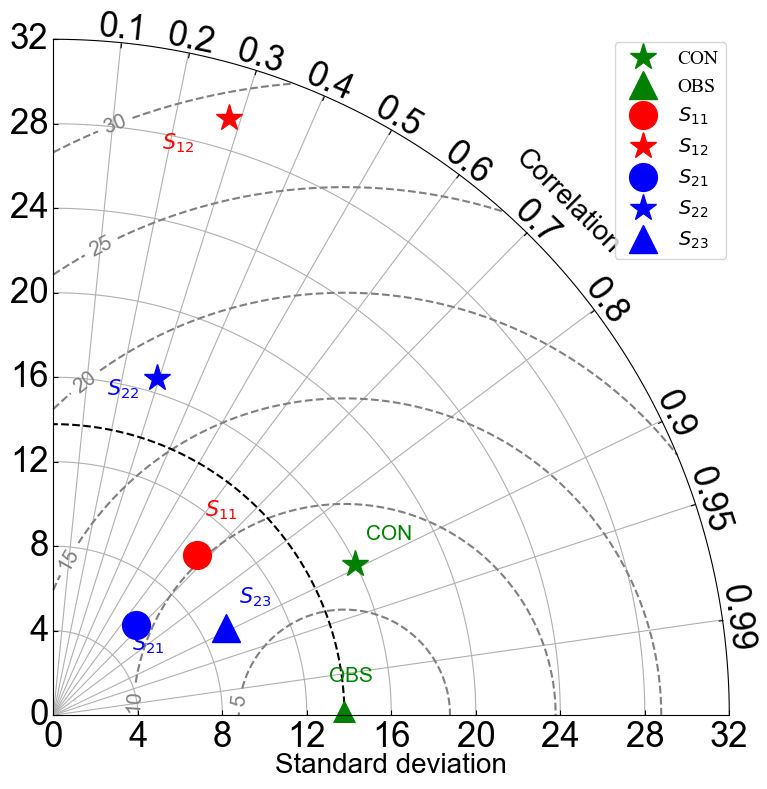

In [40]:
from taylor import TaylorDiagram


fig = plt.figure(figsize=(8,8))
r2_locs=np.arange(0,33,4)   
td=TaylorDiagram(fig=fig,refsample=smooth_BC_real,r2_locs=r2_locs)


size=20

[std1,corr1]=td.plot_taylor(smooth_BC_control,'g*',markersize=size,label='CON')
[std2,corr2]=td.plot_taylor(smooth_BC_real,'g^',markersize=size,label='OBS')
[std3,corr3]=td.plot_taylor(smooth_BC_s11,'ro',markersize=size,label='$S_{11}$')
[std4,corr4]=td.plot_taylor(smooth_BC_s12,'r*',markersize=size,label='$S_{12}$')
[std6,corr6]=td.plot_taylor(smooth_BC_s21,'bo',markersize=size,label='$S_{21}$')
[std7,corr7]=td.plot_taylor(smooth_BC_s22,'b*',markersize=size,label='$S_{22}$')
[std8,corr8]=td.plot_taylor(smooth_BC_s23,'b^',markersize=size,label='$S_{23}$')

plt.tight_layout()
plt.rcParams['font.size'] = 14.5
plt.text((std1*corr1+1)/max(r2_locs),(std1*np.sqrt(1-corr1**2)+2.5)/max(r2_locs),
         'CON',color='g',fontsize=15,transform=fig.transFigure)  
plt.text((std2*corr2)/max(r2_locs),(std2*np.sqrt(1-corr2**2)+4)/max(r2_locs),
         'OBS',color='g',fontsize=15,transform=fig.transFigure)
plt.text((std3*corr3+2)/max(r2_locs),(std3*np.sqrt(1-corr3**2)+3)/max(r2_locs),
         '$S_{11}$',color='r',fontsize=15,transform=fig.transFigure)
plt.text((std4*np.abs(corr4)-1.2)/max(r2_locs),(std4*np.sqrt(1-np.abs(corr4)**2)-3)/max(r2_locs),
         '$S_{12}$',color='r',fontsize=15,transform=fig.transFigure)
plt.text((std6*corr6+2)/max(r2_locs),(std6*np.sqrt(1-np.abs(corr6)**2)+1)/max(r2_locs),
         '$S_{21}$',color='b',fontsize=15,transform=fig.transFigure)
plt.text((std7)*corr7/max(r2_locs),(std7*np.sqrt(1-corr7**2)-0.5)/max(r2_locs),
         '$S_{22}$',color='b',fontsize=15,transform=fig.transFigure)
plt.text((std8*np.abs(corr8)+2)/max(r2_locs),(std8*np.sqrt(1-corr8**2)+3)/max(r2_locs),
         '$S_{23}$',color='b',fontsize=15,transform=fig.transFigure)

legend = plt.legend(loc='upper right', ncol=1, prop={'family': 'Times New Roman', 'size': 14})
plt.savefig('../Figures/Figure4_七种不同模拟结果泰勒图.svg')
plt.show()